# Image Classification

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 18174 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

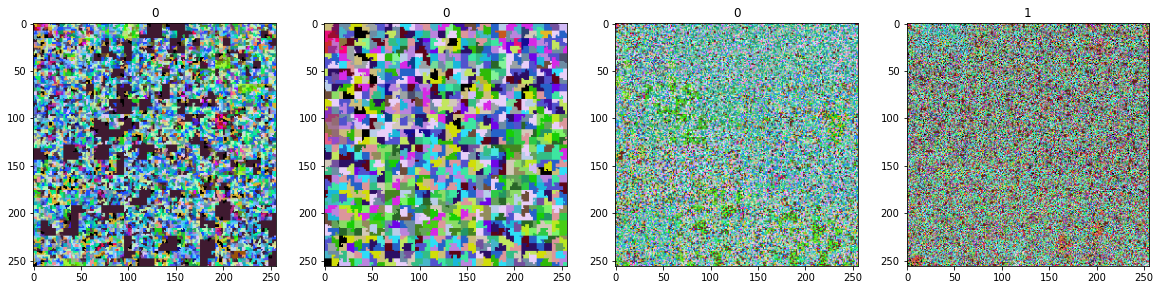

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.43137255, 0.16862746, 0.04313726],
          [0.30588236, 0.05882353, 0.4862745 ],
          [0.85882354, 0.29411766, 0.05882353],
          ...,
          [0.22352941, 0.8235294 , 0.6156863 ],
          [0.25490198, 0.84705883, 0.972549  ],
          [0.972549  , 0.92941177, 0.85490197]],
 
         [[0.43137255, 0.16862746, 0.04313726],
          [0.7607843 , 0.5647059 , 0.18039216],
          [0.64705884, 0.01176471, 0.56078434],
          ...,
          [0.972549  , 0.92941177, 0.85490197],
          [0.33333334, 0.6666667 , 0.6666667 ],
          [0.09019608, 0.8627451 , 0.3372549 ]],
 
         [[0.4627451 , 0.6039216 , 0.52156866],
          [0.20784314, 0.9607843 , 0.92941177],
          [0.84313726, 0.15686275, 0.7137255 ],
          ...,
          [0.01176471, 0.05882353, 0.3529412 ],
          [0.75686276, 0.9372549 , 0.9647059 ],
          [0.972549  , 0.92941177, 0.85490197]],
 
         ...,
 
         [[0.7607843 , 0.5647059 , 0.18039216],
          [0.24313

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

397

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
397/397 [==============================] - 624s 1s/step - loss: 0.6064 - accuracy: 0.6805 - val_loss: 0.5525 - val_accuracy: 0.7163
Epoch 2/20
397/397 [==============================] - 248s 614ms/step - loss: 0.4856 - accuracy: 0.7654 - val_loss: 0.4537 - val_accuracy: 0.7705
Epoch 3/20
397/397 [==============================] - 213s 528ms/step - loss: 0.3913 - accuracy: 0.8286 - val_loss: 0.4373 - val_accuracy: 0.8089
Epoch 4/20
397/397 [==============================] - 186s 469ms/step - loss: 0.3165 - accuracy: 0.8675 - val_loss: 0.4409 - val_accuracy: 0.8142
Epoch 5/20
397/397 [==============================] - 184s 460ms/step - loss: 0.2623 - accuracy: 0.8946 - val_loss: 0.4167 - val_accuracy: 0.8252
Epoch 6/20
397/397 [==============================] - 180s 450ms/step - loss: 0.2046 - accuracy: 0.9221 - val_loss: 0.4461 - val_accuracy: 0.8172
Epoch 7/20
397/397 [==============================] - 185s 463ms/step - loss: 0.1608 - accuracy: 0.9389 - val_loss: 0.4491 - va

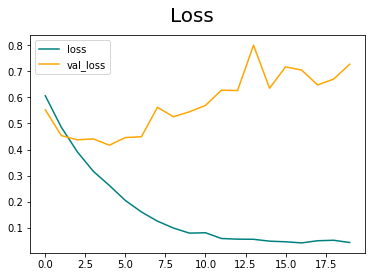

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

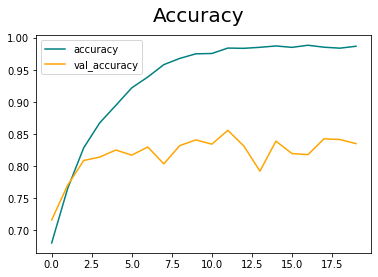

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 51ms/step


In [26]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85542166, shape=(), dtype=float32) tf.Tensor(0.7888889, shape=(), dtype=float32) tf.Tensor(0.8270089, shape=(), dtype=float32)


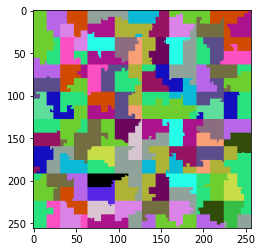

In [47]:
img = cv2.imread('bad-4.png')
plt.imshow(img)
plt.show()

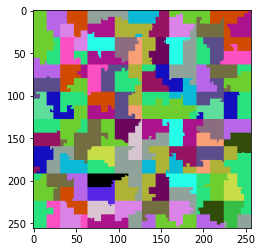

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 318ms/step


In [50]:
yhat

array([[0.07816686]], dtype=float32)

In [51]:
if yhat > 0.5: 
    print(f'Predicted class is Good')
else:
    print(f'Predicted class is Bad')

Predicted class is Bad


In [46]:
model.save("test_model.h5")